In [2]:
import sklearn.ensemble

sklearn.ensemble.__all__

['BaseEnsemble',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'IsolationForest',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'AdaBoostClassifier',
 'AdaBoostRegressor',
 'VotingClassifier',
 'VotingRegressor',
 'StackingClassifier',
 'StackingRegressor']

In [25]:
import numpy as np
import pandas as pd


from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [7]:
dat = load_breast_cancer()
data = dat.data
target = dat.target

In [33]:
dat

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
print(dat.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.3)

In [15]:
classifier = AdaBoostClassifier()

In [16]:
classifier.fit(X_train, Y_train)

AdaBoostClassifier()

In [17]:
classifier.score(X_test, Y_test)

0.9590643274853801

In [18]:
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)

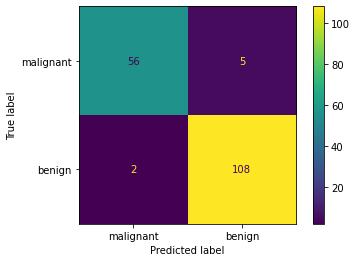

In [20]:
dr = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dat.target_names)
dr.plot()

In [24]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        61
           1       0.96      0.98      0.97       110

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



In [27]:
rf = RandomForestClassifier(criterion='entropy')
rf.__dict__

{'base_estimator': DecisionTreeClassifier(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'min_impurity_split',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'ccp_alpha': 0.0}

In [28]:
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

In [29]:
rf.score(X_test, Y_test)

0.9415204678362573

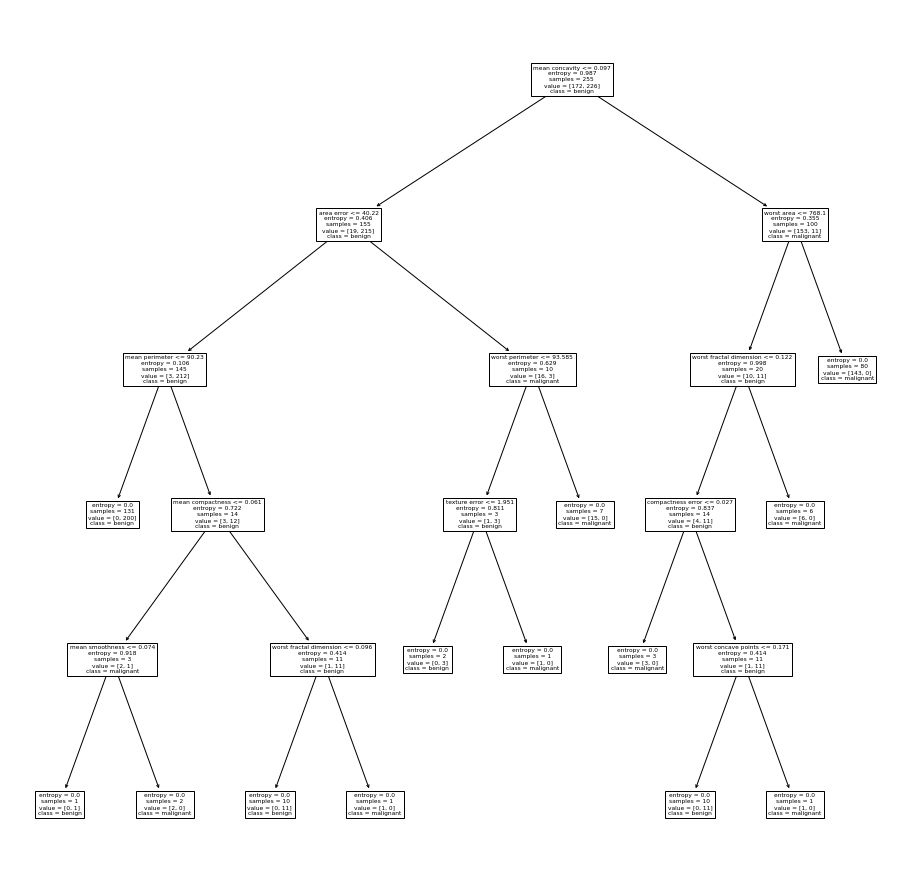

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0], feature_names=dat.feature_names, class_names=dat.target_names)
plt.show()